In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('heart.csv')

print("Shape of the data is:", data.shape)
data.head()
data.dtypes

Shape of the data is: (303, 14)


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [139]:
# Data pre-processing
data = data[data['ca'] < 4]
data = data[data['thal'] > 0]
print(f"The length of the data is: {len(data)} ins tead of 303!")

data = data.rename(columns={
    'cp': 'chest_pain_type',
    'trestbps': 'resting_blood_pressure',
    'chol': 'cholesterol',
    'fbs': 'fasting_blood_sugar',
    'restecg': 'resting_electrocardiogram',
    'thalach': 'max_heart_rate_achieved',
    'exang': 'exercise_induced_angina',
    'oldpeak': 'st_depression',
    'slope': 'st_slope',
    'ca': 'num_major_vessels',
    'thal': 'thalassemia'
}, errors='raise')

The length of the data is: 296 ins tead of 303!


In [140]:
data['sex'] = data['sex'].map({
    0: 'female',
    1: 'male'
})

data['chest_pain_type'] = data['chest_pain_type'].map({
    0: 'typical angina',
    1: 'atypical angina',
    2: 'non-anginal pain',
    3: 'asymptomatic'
})

data['fasting_blood_sugar'] = data['fasting_blood_sugar'].map({
    0: 'lower than 120mg/ml',
    1: 'greater than 120mg/ml'
})

data['resting_electrocardiogram'] = data['resting_electrocardiogram'].map({
    0: 'normal',
    1: 'ST-T wave abnormality',
    2: 'left ventricular hypertrophy'
})

data['exercise_induced_angina'] = data['exercise_induced_angina'].map({
    0: 'no',
    1: 'yes'
})

data['st_slope'] = data['st_slope'].map({
    0: 'upsloping',
    1: 'flat',
    2: 'downsloping'
})

data['thalassemia'] = data['thalassemia'].map({
    1: 'normal',
    2: 'fixed defect',
    3: 'reversible defect'
})

data.dtypes
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,normal,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,fixed defect,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,fixed defect,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,fixed defect,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,fixed defect,1


In [141]:
# Grouping features
  # numerical features 6
num_feats = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']

  # categorical (binary)
bin_feats = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina', 'target']

  #categorical (multi-)
nom_feats = ['chest_pain_type', 'resting_electrocardiogram', 'st_slope', 'thalassemia']

cat_feats = bin_feats + nom_feats


/var/folders/gw/w0kdwj254fg81s9c4wzl0q480000gn/T/ipykernel_2226/952261187.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data['target'], palette=mypal[1::4])


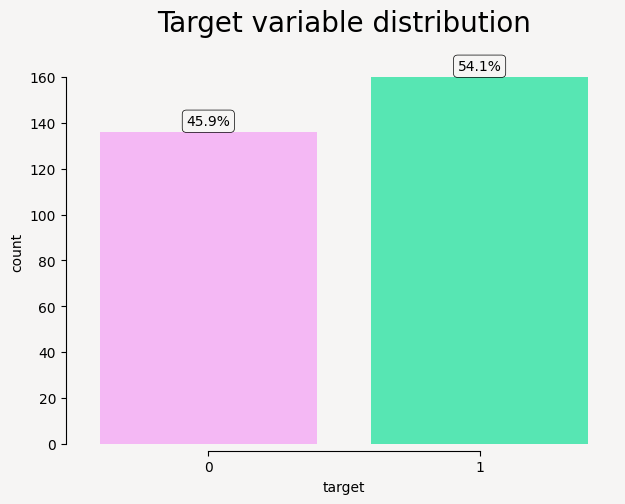

In [142]:
mypal = ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']

plt.figure(figsize=(7, 5),facecolor='#F6F5F4')
total = float(len(data))
ax = sns.countplot(x=data['target'], palette=mypal[1::4])
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., 
            height + 3,
            '{:.1f}%'.format((height/total)*100),
            ha='center', bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
    
ax.set_title("Target variable distribution", fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

In [143]:
data[num_feats].describe().T

,count,mean,std,min,25%,50%,75%,max
age,296.0,54.523649,9.059471,29.0,48.0,56.0,61.00,77.0
cholesterol,296.0,247.155405,51.977011,126.0,211.0,242.5,275.25,564.0
resting_blood_pressure,296.0,131.604730,17.726620,94.0,120.0,130.0,140.00,200.0
max_heart_rate_achieved,296.0,149.560811,22.970792,71.0,133.0,152.5,166.00,202.0
st_depression,296.0,1.059122,1.166474,0.0,0.0,0.8,1.65,6.2
num_major_vessels,296.0,0.679054,0.939726,0.0,0.0,0.0,1.00,3.0


Text(0.5, 0.98, 'Distribution of Numerical Features')

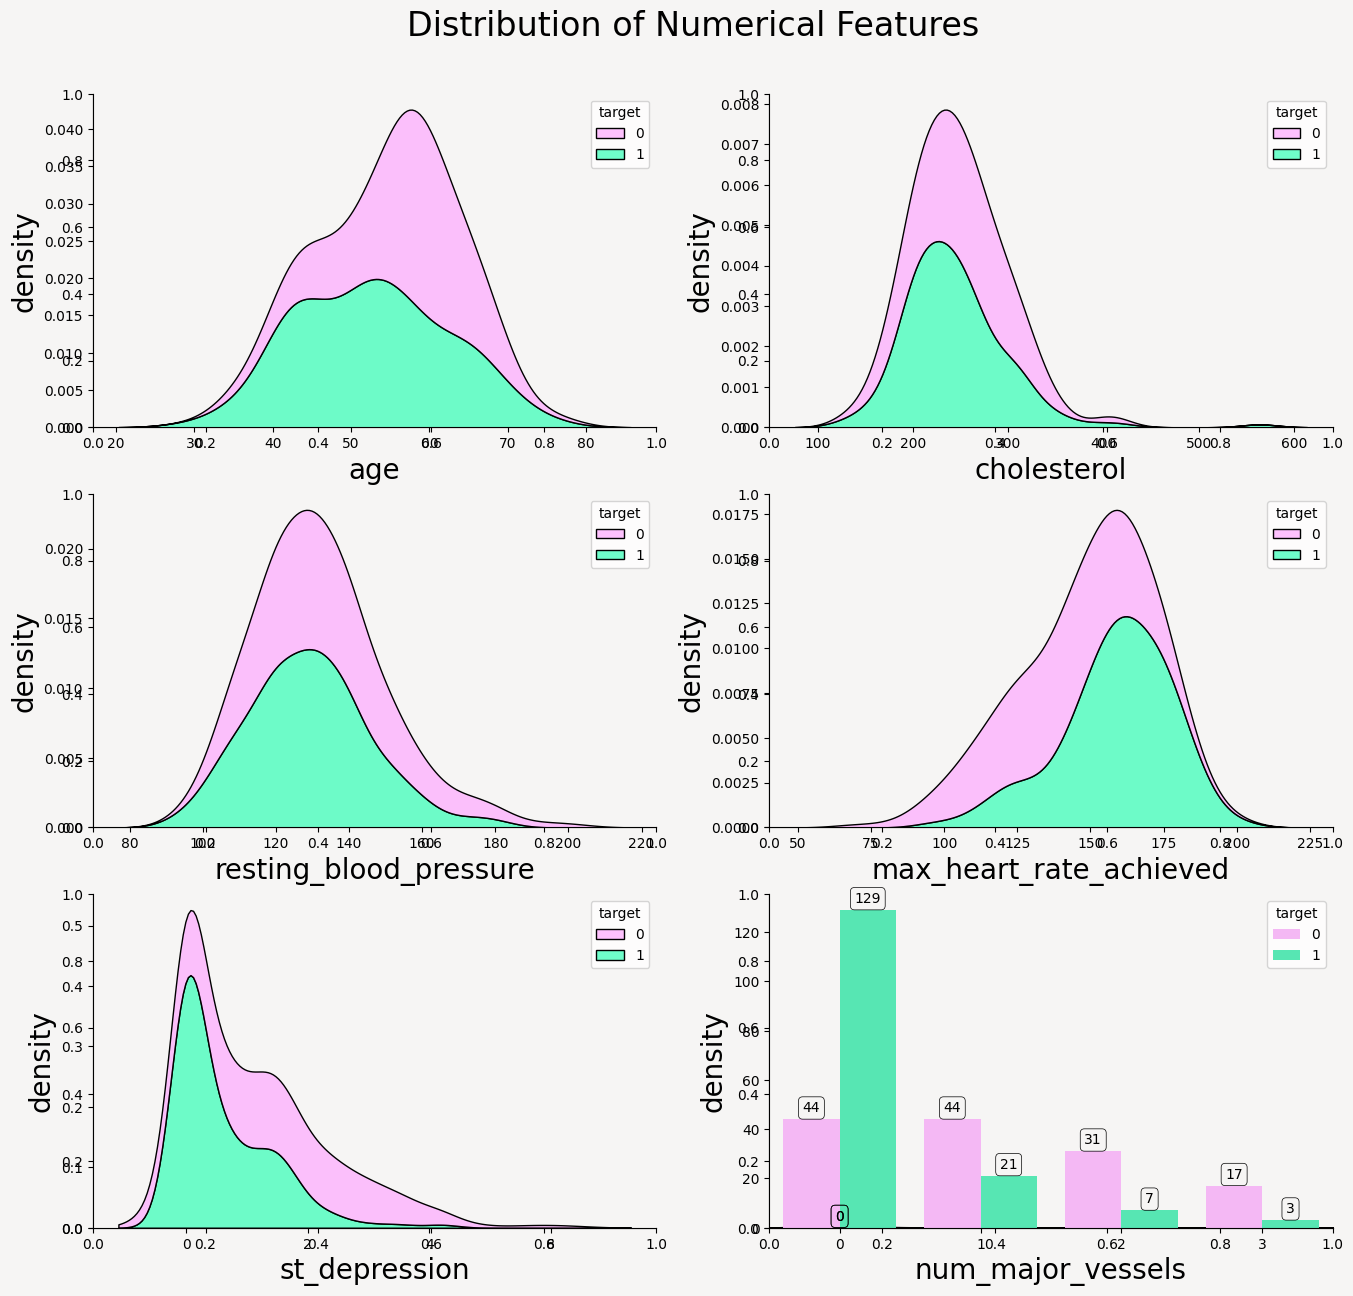

In [144]:
L = len(num_feats)
nCol = 2
nRow = int(np.ceil(L/nCol))
#remove_last= (nRow * nCol) - L

fig, ax = plt.subplots(nRow, nCol, figsize=(16, 14),facecolor='#F6F5F4')   
fig.subplots_adjust(top=0.92)

i = 1

for col in num_feats:
    plt.subplot(nRow, nCol, i, facecolor='#F6F5F4')
    
    ax = sns.kdeplot(data=data, x=col, hue="target", multiple="stack", palette=mypal[1::4]) 
    ax.set_xlabel(col, fontsize=20)
    ax.set_ylabel("density", fontsize=20)
    sns.despine(right=True)
    sns.despine(offset=0, trim=False)

    if col == 'num_major_vessels':
        sns.countplot(data=data, x=col, hue="target", palette=mypal[1::4])
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center",
                bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
            
    i = i + 1

plt.suptitle('Distribution of Numerical Features', fontsize=24)

Text(0.5, 0.98, 'Pairplot: Numerical Features')

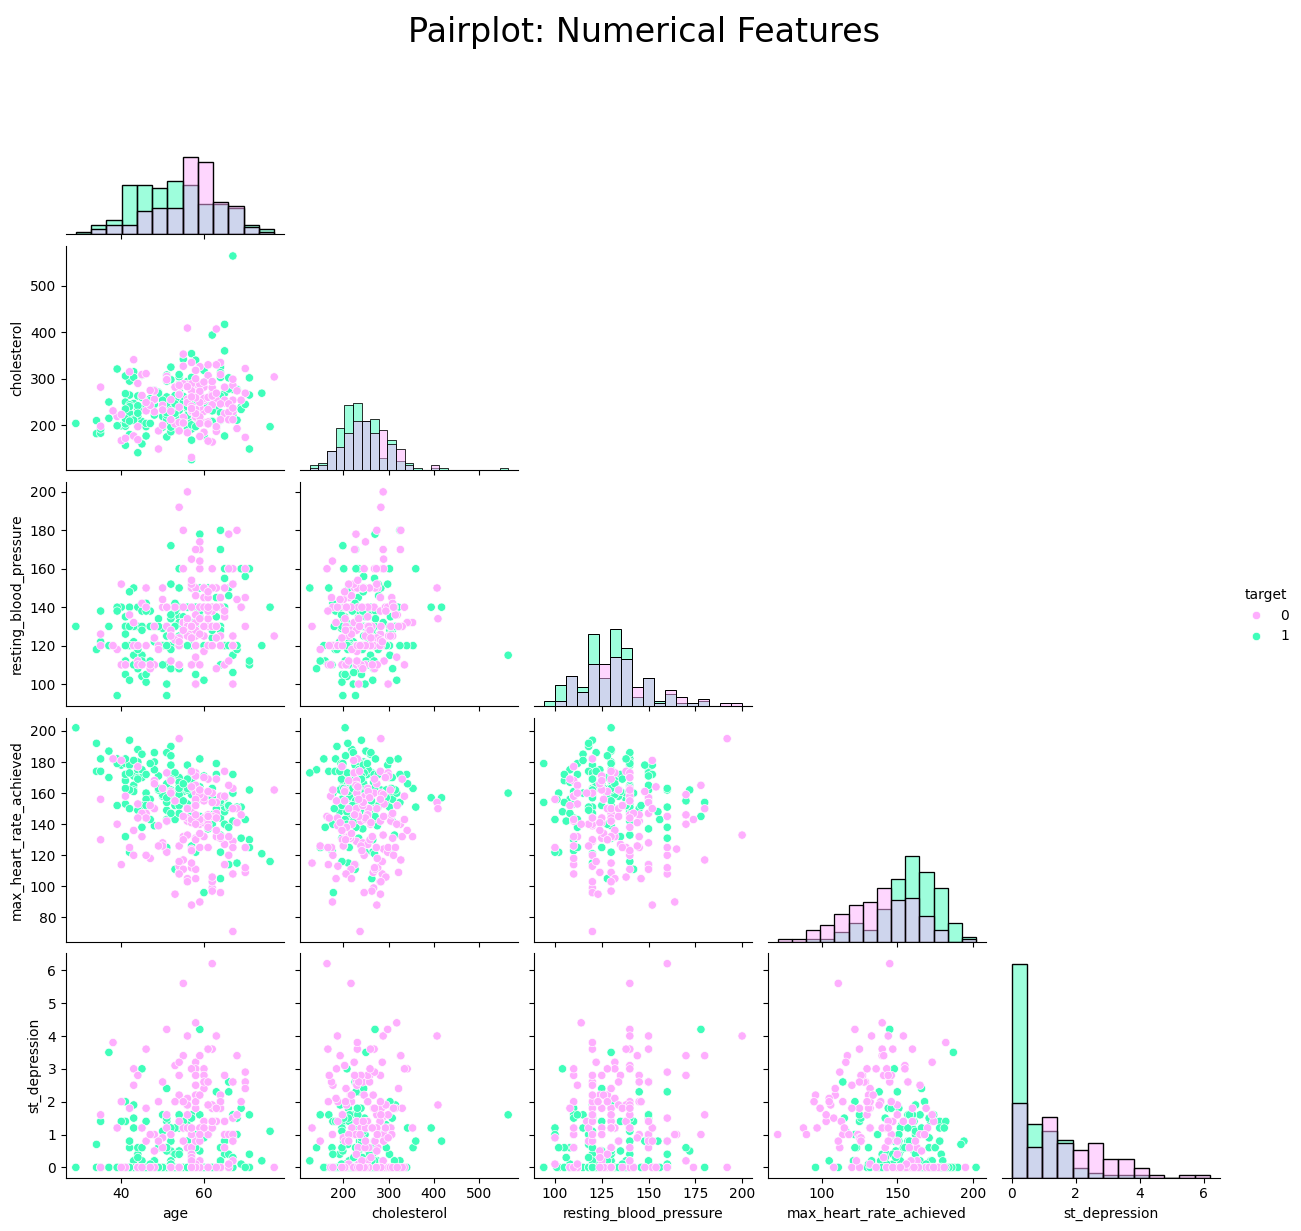

In [145]:
_ = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'target']
data_ = data[_]

g = sns.pairplot(data_, hue="target", corner=True, diag_kind='hist', palette=mypal[1::4])
plt.suptitle('Pairplot: Numerical Features', fontsize=24)

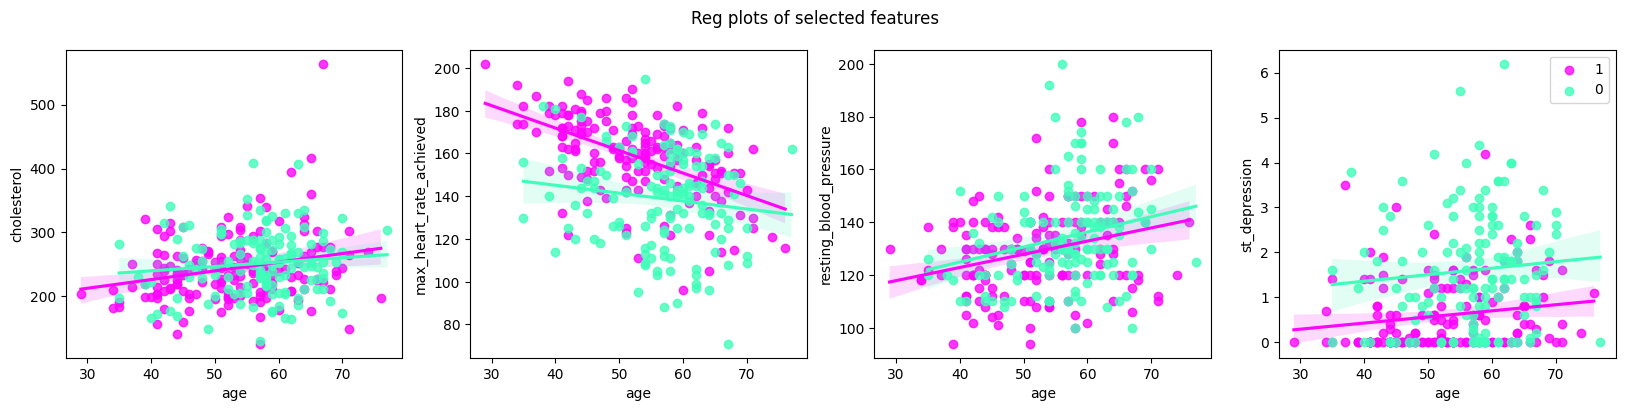

In [146]:
fig, ax = plt.subplots(1,4, figsize=(20, 4))
sns.regplot(data=data[data['target'] ==1], x='age', y='cholesterol', ax = ax[0], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='cholesterol', ax = ax[0], color=mypal[5], label='0')
sns.regplot(data=data[data['target'] ==1], x='age', y='max_heart_rate_achieved', ax = ax[1], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='max_heart_rate_achieved', ax = ax[1], color=mypal[5], label='0')
sns.regplot(data=data[data['target'] ==1], x='age', y='resting_blood_pressure', ax = ax[2], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='resting_blood_pressure', ax = ax[2], color=mypal[5], label='0')
sns.regplot(data=data[data['target'] ==1], x='age', y='st_depression', ax = ax[3], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='st_depression', ax = ax[3], color=mypal[5], label='0')
plt.suptitle('Reg plots of selected features')
plt.legend()


Text(0.5, 1.05, "Numberical features correlation (Pearson's)")

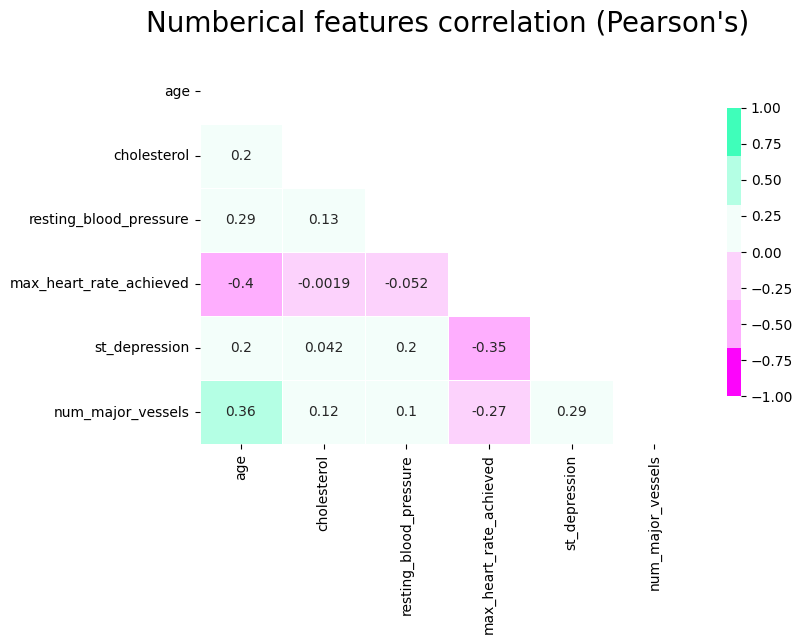

In [147]:
df_ = data[num_feats]

corr = df_.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Numberical features correlation (Pearson's)", fontsize=20, y=1.05)

Text(0.5, 1.05, 'Cont feats vs target correlation (point-biserial)')

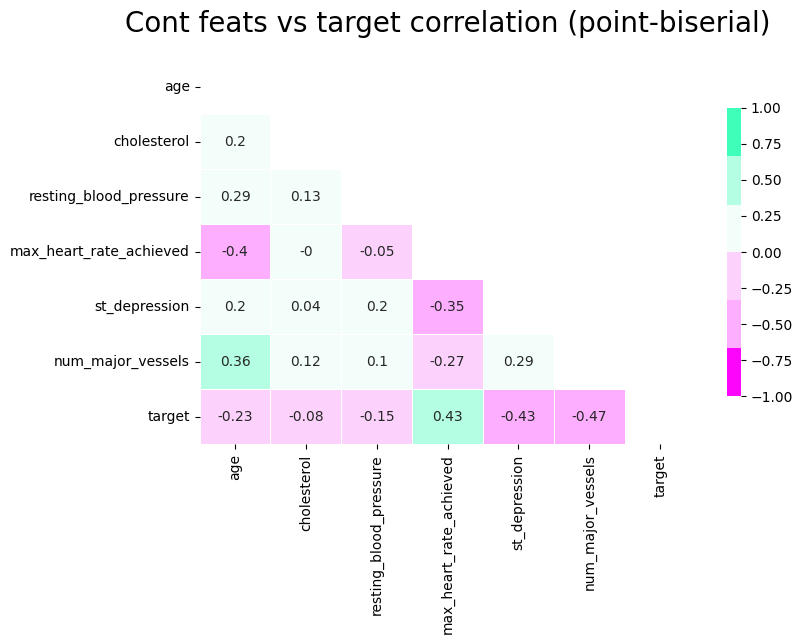

In [148]:
from scipy import stats


feats_ = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels', 'target']

def point_biserial(x,y):
    pd = stats.pointbiserialr(x, y)
    return pd[0]

rows = []
for x in feats_:
    col = []
    for y in feats_:
        pbs = point_biserial(data[x], data[y])
        col.append(round(pbs, 2))
    rows.append(col)

pds_results = np.array(rows)
DF = pd.DataFrame(pds_results, columns=data[feats_].columns, index=data[feats_].columns)

mask = np.triu(np.ones_like(DF, dtype=bool))
corr = DF.mask(mask)

f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Cont feats vs target correlation (point-biserial)", fontsize=20, y=1.05)

Text(0.5, 1.05, "Categorical Features Correlation (Cramer's V)")

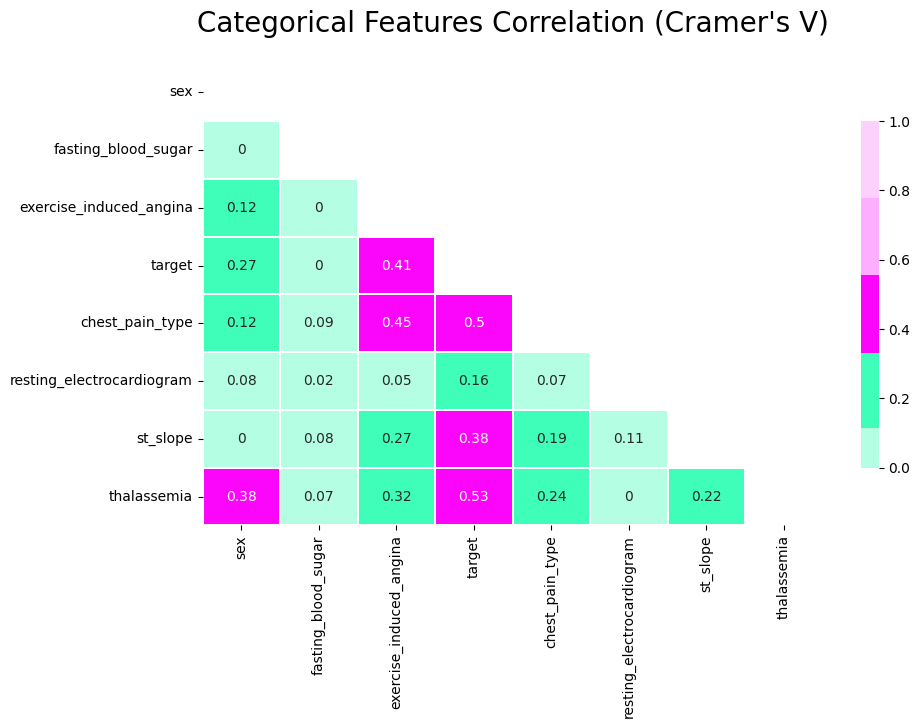

In [149]:
def caramers_v(x,y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]

    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape

    phi2corr = max(0, phi2 - (k-1)*(r-1)/(n-1))
    rCorr = r - ((r-1)**2)/(n-1)
    kCorr = k - ((k-1)**2)/(n-1)

    return np.sqrt(phi2corr / min((kCorr-1), (rCorr-1)))

data_= data[cat_feats]
rows = []
for x in data_:
    col = []
    for y in data_:
        caramers = caramers_v(data_[x], data_[y])
        col.append(round(caramers, 2))
    rows.append(col)

caramers_results = np.array(rows)
df = pd.DataFrame(caramers_results, columns=data_.columns, index=data_.columns)

mypal_1= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA', '#FC05FB', '#FEAEFE', '#FCD2FC']

# plot the heat map
mask = np.triu(np.ones_like(df, dtype=bool))
corr = df.mask(mask)
f, ax = plt.subplots(figsize=(10, 6), facecolor=None)
cmap = sns.color_palette(mypal_1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=0, center=0, annot=True,
            square=False, linewidths=.01, cbar_kws={"shrink": 0.75})
ax.set_title("Categorical Features Correlation (Cramer's V)", fontsize=20, y= 1.05)

In [150]:
# Prediction
def label_encode_cat_features(data, cat_feats):
    '''
    Given a dataframe and its categorical features, this function returns label-encoded dataframe
    '''
    
    label_encoder = LabelEncoder()
    data_encoded = data.copy()

    for col in cat_feats:
        data_encoded[col] = label_encoder.fit_transform(data_encoded[col])

    data = data_encoded
    return data

def score_summary(names, classifiers):
    '''
    Given a list of classifiers, this function calculates the accuracy, 
    ROC_AUC and Recall and returns the values in a dataframe
    '''

    cols=["Classifier", "Accuracy", "ROC_AUC", "Recall", "Precision", "F1"]
    data_table = pd.DataFrame(columns=cols)

    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)

        pred = clf.predict(X_val)
        accuracy = accuracy_score(y_val, pred)
    
        pred_proba = clf.predict_proba(X_test)[:, 1]

        fpr, tpr, thresholds = roc_curve(y_val, pred_proba)


        roc_auc = auc(fpr, tpr)

        # confusion matrix, cm
        cm = confusion_matrix(y_val, pred)

        # recall: TP/(TP+FN)
        recall = cm[1,1]/(cm[1,1] + cm[1,0])

        # precision: TP/(TP+FP)
        precision = cm[1,1]/(cm[1,1] + cm[0,1])

        # F1 score: TP/(TP+FP)
        f1 = 2 * recall * precision / (recall + precision)

        df = pd.DataFrame([[name, accuracy*100, roc_auc, recall, precision, f1]], columns=cols)
        data_table = data_table.append(df) 

        return (np.round(data_table.reset_index(drop=True), 2))
    

def plot_conf_matrix(names, classifiers, nRows, nCols, fig_a, fig_b):
    '''
    Plots confusion matrices in a subplots.
    
    Args:
        names : list of names of the classifier
        classifiers : list of classification algorithms
        nRows, nCols : number of rows and rows in the subplots
        fig_a, fig_b : dimensions of the figure size
    '''

    fig, axes = plt.subplots(nrows= nRows, ncols=nCols, figsize=(fig_a, fig_b))

    i = 0
    for clf, ax in zip(classifiers, axes.flatten()):
        clf.fit(X_train, y_train)
        plot_conf_matrix(clf, X_val, y_val, ax=ax)
        ax.title.set_text(names[i])
        i += 1

    plt.tight_layout()
    plt.show()

def roc_auc_curve(names, classifiers):
     '''
    Given a list of classifiers, this function plots the ROC curves
    
    '''       
